In [3]:
import pandas as pd
import dateutil

figureName = 'Platelet Donors by Month'

#startDate = datetime.datetime(2018, 7, 1) # datetime.now - 1 year
#endDate = datetime.now()
plDons_df = pd.read_csv('../OneBlood_EBI/py_dash_automation/extractors/data/mktCollect_Jul18_platelet_dons.csv')
# Convert date from string to date times
plDons_df['FullDateUSA'] = plDons_df['FullDateUSA'].apply(dateutil.parser.parse, dayfirst=False)

In [10]:
plDons_data =pd.read_csv('../OneBlood_EBI/py_dash_automation/extractors/data/mktCollect_Jul18_platelet_dons.csv')
plDons_df = pd.DataFrame(plDons_data, columns=plDons_data.columns)

plDons_df.head()

,person_id,FullDateUSA,min_reg_id,total_platelet_donations
0,236261,07/05/2018,108539649,2
1,565382,07/05/2018,108540087,2
2,2200697,07/05/2018,108540311,2
3,50911154,07/05/2018,108540245,1
4,51661992,07/05/2018,108539608,1


In [5]:
for key in plDons_df.columns:
    print(key)

person_id
FullDateUSA
min_reg_id
total_platelet_donations


In [9]:
plDons_df.head(50)

,person_id,FullDateUSA,min_reg_id,total_platelet_donations
0,236261,2018-07-05,108539649,2
1,565382,2018-07-05,108540087,2
2,2200697,2018-07-05,108540311,2
3,50911154,2018-07-05,108540245,1
4,51661992,2018-07-05,108539608,1
5,51702486,2018-07-05,108540065,1
6,51720104,2018-07-05,108539618,2
7,51753980,2018-07-05,108539610,4
8,51780502,2018-07-05,108540953,2
9,51795944,2018-07-05,108539682,3


In [51]:
# How many entries are there for each month?
plDateCount = plDons_df['FullDateUSA'].value_counts()
plDateCount.head(10)

"""
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(['month', 'item']).agg({'duration': [min, max, sum],      # find the min, max, and sum of the duration column
                                     'network_type': "count", # find the number of network type entries
                                     'date': [min, 'first', 'nunique']})    # get the min, first, and number of unique dates per group
"""

AttributeError: 'Series' object has no attribute 'columns'

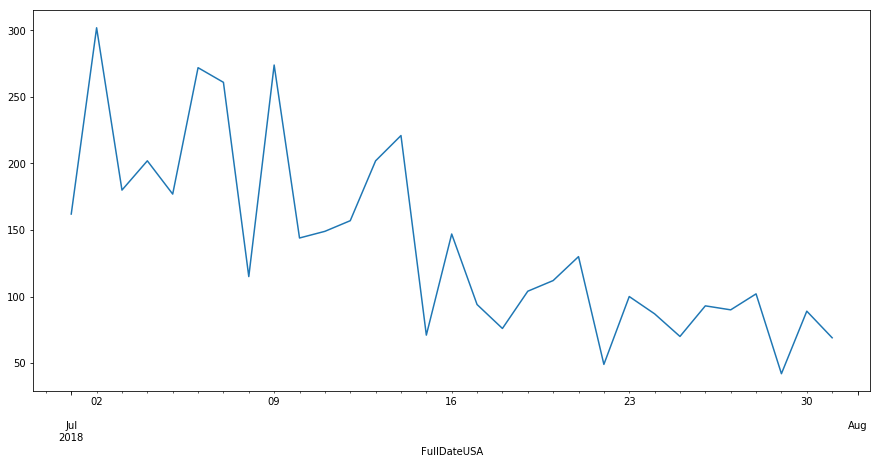

In [68]:
# Define the aggregation procedure outside of the groupby operation
aggregations = {
    'person_id': 'count'
    # 'date': lambda x: max(x) - 1
}

date_groups = plDons_df.groupby('FullDateUSA')
grouped = date_groups.agg(aggregations)

#plot data
fig, ax = plt.subplots(figsize=(15,7))
plDons_df.groupby(['FullDateUSA']).count()['person_id'].plot(ax=ax)
    
# grouped = plDons_df.groupby('FullDateUSA')['person_id'].count()

# Deprecated:
#grouped = plDons_df.groupby('FullDateUSA').agg({'person_id': {'num_persons': 'count'}}) 

# grouped.columns = grouped.columns.droplevel(level=0)

# print(type(grouped))

#grouped.describe()

# rename grouped cols
#grouped.columns = ["num_persons"]

#grouped.head()
